<a href="https://colab.research.google.com/github/rizzaesh/Thesis---a-two-layer-power-network/blob/main/intro_with_pandapower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydgrid
import pydgrid

     |████████████████████████████████| 4.2 MB 12.6 MB/s 


In [ ]:
from pydgrid import grid

In [8]:
!pip install pandapower
import pandapower as pp
import networkx as nx
import pandapower.networks as pn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandapower.topology as top
# import networkx as nx
from pandapower import plotting
from pandapower.plotting import simple_plot, pf_res_plotly,simple_plotly

# pandapower

In [ ]:
net = pp.create_empty_network(name="power")

In [ ]:
net

This pandapower network includes the following parameter tables:

In [ ]:
pp.create_bus(net=net,name='bus1',vn_kv=-1)

0

In [ ]:
net

This pandapower network includes the following parameter tables:
   - bus (1 element)

In [ ]:
pp.create_line(net=net,from_bus=3,to_bus=5,length_km=1,std_type='NAYY 4x50 SE')

7

In [ ]:
pp.create_load(net=net,bus=5,p_mw=2)

5

In [ ]:
Net

This pandapower network includes the following parameter tables:
   - bus (110 elements)
   - load (92 elements)
   - gen (50 elements)
   - shunt (14 elements)
   - ext_grid (1 element)
   - line (147 elements)
   - trafo (12 elements)
   - poly_cost (54 elements)
   - bus_geodata (110 elements)
 and the following results tables:
   - res_bus (110 elements)
   - res_line (147 elements)
   - res_trafo (12 elements)
   - res_ext_grid (1 element)
   - res_load (92 elements)
   - res_shunt (14 elements)
   - res_gen (50 elements)

In [ ]:
pp.create_motor(net=net, bus=0, pn_mech_mw=1,cos_phi=0.9)

0

In [ ]:
pp.create_gen(net=net,bus=3,p_mw=4,slack=True)

3

In [ ]:
pp.rundcpp(net=net)

In [ ]:
Net = pn.case9()

In [ ]:
from_bus = Net.line['from_bus']
to_bus = Net.line['to_bus']
edges = [(from_bus[i],to_bus[i]) for i in range(len(from_bus))]

In [ ]:
pp.rundcpp(net=Net)

In [ ]:
pp.drop_buses(Net, O0, drop_elements=True)

In [ ]:
pp.drop_lines(Net,[5,13,15,16,17,168,169])

In [ ]:
pp.overloaded_lines(Net)

Int64Index([], dtype='int64')

In [ ]:
sum(Net.res_line['p_to_mw'])

46.19565217391308

In [ ]:
Net = pn.case30()

In [ ]:
Net

This pandapower network includes the following parameter tables:
   - bus (30 elements)
   - load (20 elements)
   - gen (5 elements)
   - shunt (2 elements)
   - ext_grid (1 element)
   - line (41 elements)
   - poly_cost (6 elements)
   - bus_geodata (30 elements)

In [ ]:
pp.create_bus(Net,name=9,vn_kv=0.1)

In [ ]:
pp.create_gen(Net,9,400,)

3

In [ ]:
pp.create_line(Net,from_bus=4,to_bus=9,length_km=1,std_type='NAYY 4x50 SE')

14

In [ ]:
Net.res_bus

,vm_pu,va_degree,p_mw,q_mvar


In [ ]:
Net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,230.0,0.0,-230.0,0.0,0.0,0.0,0.384900,0.384900,0.384900,1.0,0.000000,1.0,-7.590545,92.000000
1,105.0,0.0,-105.0,0.0,0.0,0.0,0.175715,0.175715,0.175715,1.0,-7.590545,1.0,-13.125317,42.000000
2,15.0,0.0,-15.0,0.0,0.0,0.0,0.025102,0.025102,0.025102,1.0,-13.125317,1.0,-14.586360,10.000000
3,85.0,0.0,-85.0,0.0,0.0,0.0,0.142246,0.142246,0.142246,1.0,-11.732457,1.0,-14.586360,28.333333
4,100.0,0.0,-100.0,0.0,0.0,0.0,0.167348,0.167348,0.167348,1.0,-14.586360,1.0,-20.361774,66.666667
8,-125.0,0.0,125.0,0.0,0.0,0.0,0.209185,0.209185,0.209185,1.0,-13.678221,1.0,-7.590545,50.000000


In [ ]:
current = pd.DataFrame()

In [ ]:
Nett = pn.case30()
line = pd.DataFrame()
from_bus = Nett.line['from_bus']
to_bus = Nett.line['to_bus']
edges = [(from_bus[i],to_bus[i]) for i in range(len(from_bus))]
line["line"] =  edges
edges[pp.overloaded_lines(Net)[0]]

In [ ]:
pp.overloaded_lines(Net)[0]

29

Int64Index([31, 32, 34], dtype='int64')
Int64Index([29], dtype='int64')
Int64Index([], dtype='int64')


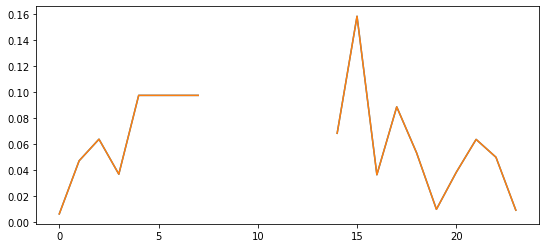

In [ ]:
h= [9,5]
Net = pn.case30();
# pp.drop_buses(Net, [23,26,24,25,28,29], drop_elements=True);
pp.drop_buses(Net, h, drop_elements=True);
linka = []
pp.rundcpp(net=Net);
while len(pp.overloaded_lines(Net))!= 0:
    for i in pp.overloaded_lines(Net):
        linka.append(i)
    print(pp.overloaded_lines(Net));
    pp.drop_lines(Net, lines=pp.overloaded_lines(Net));
    pp.rundcpp(net=Net);
print(pp.overloaded_lines(Net));
current['af_r_7'] = Net.res_line['i_ka'];
current['base'].plot(figsize = (9,4));
current['af_r_7'].plot(figsize = (9,4));

In [ ]:
linka

[31, 32, 34, 29]

In [ ]:
lost = []
for i in range(len(linka)):
    lost.append(line["line"][linka].iloc[i])
lost

[(22, 23), (23, 24), (24, 26), (14, 22)]

In [ ]:
line["line"][linka].iloc[1]

(23, 24)

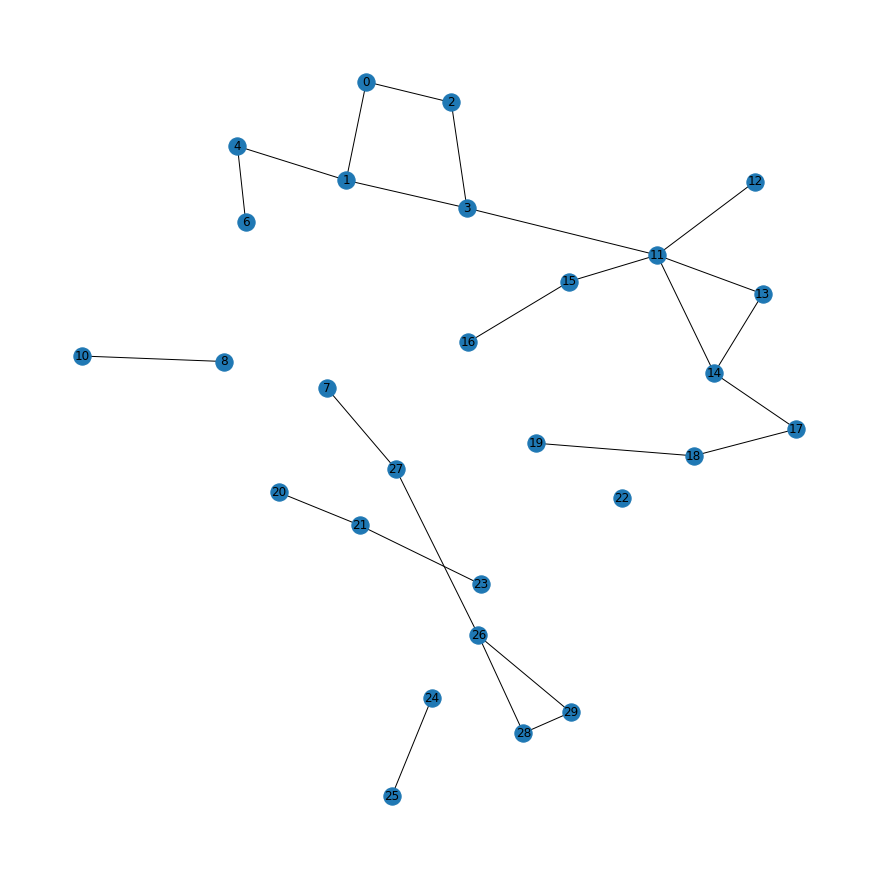

In [ ]:
g = nx.Graph()
g.add_edges_from(edges)
pos = nx.spring_layout(g, seed=3068)  # Seed layout for reproducibility
# g.remove_nodes_from([23,26,24,25,28,29])
g.remove_nodes_from(h)
g.remove_edges_from(lost)
plt.figure(figsize=(12,12))
nx.draw(g,pos=pos,with_labels=True)
plt.show()

# 1 - start with clean attitude

create a power network from IEEE traditional power networks

In [ ]:
Network = pn.case1888rte
Net = Network() # in this example we use IEEE network known as 30-buses
Net

In [20]:
G = top.create_nxgraph(Net)

[((0, 0), (0, 1)), ((1, 0), (1, 1)), ((2, 0), (2, 1)), ((3, 0), (3, 1)), ((4, 0), (4, 1)), ((5, 0), (5, 1)), ((6, 0), (6, 1)), ((7, 0), (7, 1)), ((8, 0), (8, 1)), ((9, 0), (9, 1)), ((10, 0), (10, 1)), ((11, 0), (11, 1)), ((12, 0), (12, 1)), ((13, 0), (13, 1)), ((14, 0), (14, 1)), ((15, 0), (15, 1)), ((16, 0), (16, 1)), ((17, 0), (17, 1)), ((18, 0), (18, 1)), ((19, 0), (19, 1)), ((20, 0), (20, 1)), ((21, 0), (21, 1)), ((22, 0), (22, 1)), ((23, 0), (23, 1)), ((24, 0), (24, 1)), ((25, 0), (25, 1)), ((26, 0), (26, 1)), ((27, 0), (27, 1)), ((28, 0), (28, 1)), ((29, 0), (29, 1)), ((30, 0), (30, 1)), ((31, 0), (31, 1)), ((32, 0), (32, 1)), ((33, 0), (33, 1)), ((34, 0), (34, 1)), ((35, 0), (35, 1)), ((36, 0), (36, 1)), ((37, 0), (37, 1)), ((38, 0), (38, 1)), ((39, 0), (39, 1)), ((40, 0), (40, 1)), ((41, 0), (41, 1)), ((42, 0), (42, 1)), ((43, 0), (43, 1)), ((44, 0), (44, 1)), ((45, 0), (45, 1)), ((46, 0), (46, 1)), ((47, 0), (47, 1)), ((48, 0), (48, 1)), ((49, 0), (49, 1)), ((50, 0), (50, 1)),

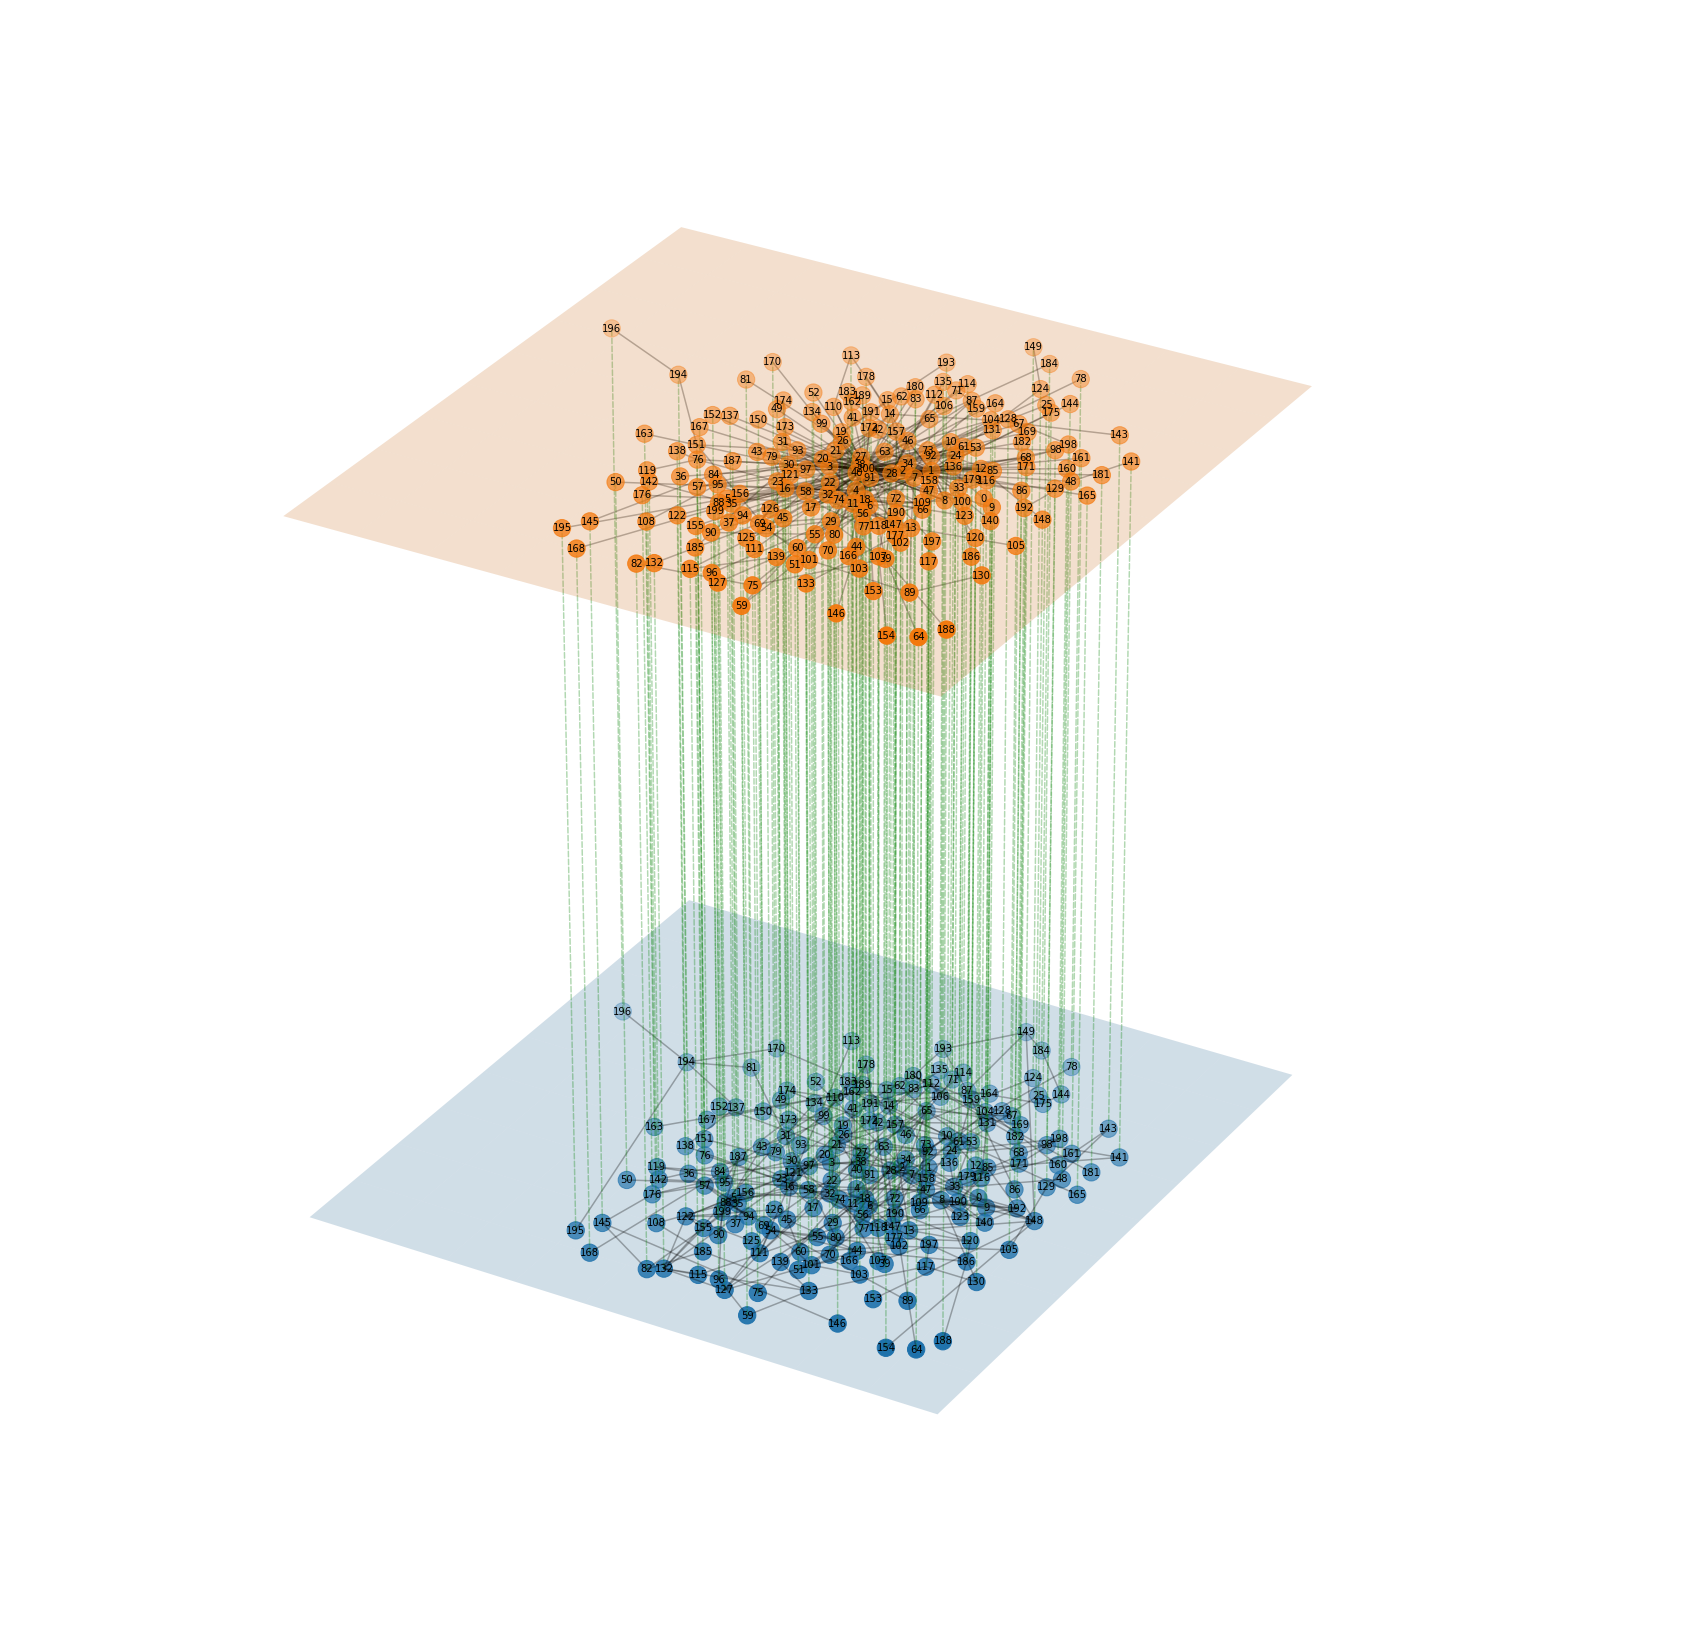

In [23]:
#!/usr/bin/env python
"""
Plot multi-graphs in 3D.
"""
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection


class LayeredNetworkGraph(object):

    def __init__(self, graphs, node_labels=None, layout=nx.spring_layout, ax=None):
        """Given an ordered list of graphs [g1, g2, ..., gn] that represent
        different layers in a multi-layer network, plot the network in
        3D with the different layers separated along the z-axis.

        Within a layer, the corresponding graph defines the connectivity.
        Between layers, nodes in subsequent layers are connected if
        they have the same node ID.

        Arguments:
        ----------
        graphs : list of networkx.Graph objects
            List of graphs, one for each layer.

        node_labels : dict node ID : str label or None (default None)
            Dictionary mapping nodes to labels.
            If None is provided, nodes are not labelled.

        layout_func : function handle (default networkx.spring_layout)
            Function used to compute the layout.

        ax : mpl_toolkits.mplot3d.Axes3d instance or None (default None)
            The axis to plot to. If None is given, a new figure and a new axis are created.

        """

        # book-keeping
        self.seed = 1531
        self.graphs = graphs
        self.total_layers = len(graphs)

        self.node_labels = node_labels
        self.layout = layout

        if ax:
            self.ax = ax
        else:
            fig = plt.figure()
            self.ax = fig.add_subplot(111, projection='3d')

        # create internal representation of nodes and edges
        self.get_nodes()
        self.get_edges_within_layers()
        self.get_edges_between_layers()

        # compute layout and plot
        self.get_node_positions()
        self.draw()


    def get_nodes(self):
        """Construct an internal representation of nodes with the format (node ID, layer)."""
        self.nodes = []
        for z, g in enumerate(self.graphs):
            self.nodes.extend([(node, z) for node in g.nodes()])


    def get_edges_within_layers(self):
        """Remap edges in the individual layers to the internal representations of the node IDs."""
        self.edges_within_layers = []
        for z, g in enumerate(self.graphs):
            self.edges_within_layers.extend([((source, z), (target, z)) for source, target in g.edges()])


    def get_edges_between_layers(self):
        """Determine edges between layers. Nodes in subsequent layers are
        thought to be connected if they have the same ID."""
        self.edges_between_layers = []
        for z1, g in enumerate(self.graphs[:-1]):
            z2 = z1 + 1
            h = self.graphs[z2]
            shared_nodes = set(g.nodes()) & set(h.nodes())
            self.edges_between_layers.extend([((node, z1), (node, z2)) for node in shared_nodes])


    def get_node_positions(self, *args, **kwargs):
        """Get the node positions in the layered layout."""
        # What we would like to do, is apply the layout function to a combined, layered network.
        # However, networkx layout functions are not implemented for the multi-dimensional case.
        # Futhermore, even if there was such a layout function, there probably would be no straightforward way to
        # specify the planarity requirement for nodes within a layer.
        # Therefor, we compute the layout for the full network in 2D, and then apply the
        # positions to the nodes in all planes.
        # For a force-directed layout, this will approximately do the right thing.
        # TODO: implement FR in 3D with layer constraints.

        composition = self.graphs[0]
        for h in self.graphs[1:]:
            composition = nx.compose(composition, h)

        pos = self.layout(composition, *args, **kwargs,seed=self.seed)

        self.node_positions = dict()
        for z, g in enumerate(self.graphs):
            self.node_positions.update({(node, z) : (*pos[node], z) for node in g.nodes()})


    def draw_nodes(self, nodes, *args, **kwargs):
        x, y, z = zip(*[self.node_positions[node] for node in nodes])
        self.ax.scatter(x, y, z, *args, **kwargs)


    def draw_edges(self, edges, *args, **kwargs):
        segments = [(self.node_positions[source], self.node_positions[target]) for source, target in edges]
        line_collection = Line3DCollection(segments, *args, **kwargs)
        self.ax.add_collection3d(line_collection)


    def get_extent(self, pad=0.1):
        xyz = np.array(list(self.node_positions.values()))
        xmin, ymin, _ = np.min(xyz, axis=0)
        xmax, ymax, _ = np.max(xyz, axis=0)
        dx = xmax - xmin
        dy = ymax - ymin
        return (xmin - pad * dx, xmax + pad * dx), \
            (ymin - pad * dy, ymax + pad * dy)


    def draw_plane(self, z, *args, **kwargs):
        (xmin, xmax), (ymin, ymax) = self.get_extent(pad=0.1)
        u = np.linspace(xmin, xmax, 10)
        v = np.linspace(ymin, ymax, 10)
        U, V = np.meshgrid(u ,v)
        W = z * np.ones_like(U)
        self.ax.plot_surface(U, V, W, *args, **kwargs)


    def draw_node_labels(self, node_labels, *args, **kwargs):
        for node, z in self.nodes:
            if node in node_labels:
                ax.text(*self.node_positions[(node, z)], node_labels[node], *args, **kwargs)


    def draw(self):

        self.draw_edges(self.edges_within_layers,  color='k', alpha=0.3, linestyle='-', zorder=2)
        self.draw_edges(self.edges_between_layers, color='g', alpha=0.3, linestyle='--', zorder=2)
        print(self.edges_between_layers)
        for z in range(self.total_layers):
            self.draw_plane(z, alpha=0.2, zorder=1)
            self.draw_nodes([node for node in self.nodes if node[1]==z], s=300, zorder=3)

        if self.node_labels:
            self.draw_node_labels(self.node_labels,
                                  horizontalalignment='center',
                                  verticalalignment='center',
                                  zorder=100)


if __name__ == '__main__':

    # define graphs
    # n = 50
    seed = 1531
    # n = 10
    # m = 3
    # p = 0.1
    Network = pn.case_illinois200
    Net = Network() # in this example we use IEEE network known as 30-buses
    G = top.create_nxgraph(Net)
    n = len(G.nodes())+1
    # g = nx.watts_strogatz_graph(4*n,m,p,seed = seed)
    # g = nx.erdos_renyi_graph(4*n, p=0.1, seed=seed)
    # h = nx.gnm_random_graph(4*n, 5*n, seed = seed )
    alpha = 0.49
    beta = 0.5
    gamma = 1-(alpha + beta)
    Gr = nx.scale_free_graph(n= n, alpha= alpha, beta= beta, gamma= gamma, seed= seed, delta_in=1, delta_out=1 )
    edge = list(Gr.edges)
    edges = [(i[0],i[1]) for i in edge if i[0]!=i[1] ]
    i = nx.MultiGraph()
    i.add_edges_from(edges)
    mapping = {0:len(i.nodes)-1,len(i.nodes)-1:0}
    i = nx.relabel_nodes(i, mapping)
    # mapping = {5:6,6:5}
    # i = nx.relabel_nodes(i, mapping)
    # i = nx.erdos_renyi_graph(2*n, p=0.4)
    # print(len(i.nodes))
    node_labels = {nn : str(nn) for nn in range(4*n+1)}

    # initialise figure and plot
    fig = plt.figure(figsize=(30,30))
    ax = fig.add_subplot(111, projection='3d')
    LayeredNetworkGraph([G, i], node_labels=node_labels, ax=ax, layout=nx.spring_layout)
    ax.set_axis_off()
    plt.show()

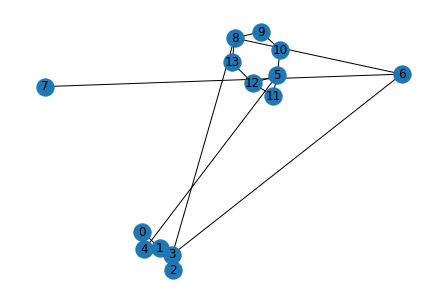

In [7]:
nx.draw(G,with_labels=True)

In [ ]:
simple_plotly(Net)

In [ ]:
pp.rundcpp(net=Net) #we will solve the current equation

In [ ]:
pp.drop_buses(Net, [22], drop_elements=True); # drop the nodes

In [ ]:
Net.bus['vn_kv'][10] = 110

In [ ]:
pf_res_plotly(Net)

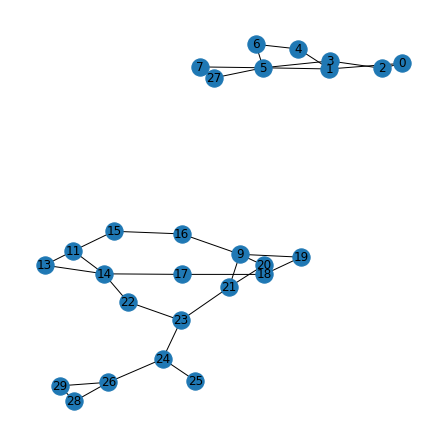

In [ ]:
G = nx.Graph()        
line = pd.DataFrame()                                           # In here we extract the nodes and
from_bus = Net.line['from_bus']                                 # edges from this network for basic
to_bus = Net.line['to_bus']                                     # visualization.
edges = [(from_bus[i],to_bus[i]) for i in range(len(from_bus))] # the final edges is list of all the edges
line["line"] =  edges                  # use matplotlib visual
G.add_edges_from(edges)
pos = nx.spring_layout(G, seed=3068)    # Seed layout for reproducibility)
plt.figure(figsize=(6,6))
nx.draw(G,pos=pos,with_labels=True)
plt.show()

In [ ]:
pp.create_line(net=Net,from_bus=1,to_bus=3,length_km=2,std_type="70-AL1/11-ST1A 20.0",max_loading_percent=100)

44

In [ ]:
Net.

,element,et,cp0_eur,cp1_eur_per_mw,cp2_eur_per_mw2,cq0_eur,cq1_eur_per_mvar,cq2_eur_per_mvar2
0,0,ext_grid,0.0,20.0,0.043029,0.0,0.0,0.0
1,0,gen,0.0,20.0,0.250000,0.0,0.0,0.0
2,1,gen,0.0,40.0,0.010000,0.0,0.0,0.0
3,2,gen,0.0,40.0,0.010000,0.0,0.0,0.0
4,3,gen,0.0,40.0,0.010000,0.0,0.0,0.0


In [ ]:
Net.line

,c_nf_per_km,df,from_bus,g_us_per_km,in_service,length_km,max_i_ka,max_loading_percent,name,parallel,r_ohm_per_km,std_type,to_bus,type,x_ohm_per_km
0,768.484773,1.0,0,0.0,True,1.0,42.339020,100.0,None,1,3.532005,None,1,ol,10.783732
1,716.088084,1.0,0,0.0,True,1.0,42.339020,100.0,None,1,9.846967,None,4,ol,40.649040
2,637.493051,1.0,1,0.0,True,1.0,42.339020,100.0,None,1,8.563928,None,2,ol,36.080033
3,494.857619,1.0,1,0.0,True,1.0,42.339020,100.0,None,1,10.590547,None,3,ol,32.134320
4,503.590401,1.0,1,0.0,True,1.0,42.339020,100.0,None,1,10.379138,None,4,ol,31.689630
5,186.299339,1.0,2,0.0,True,1.0,42.339020,100.0,None,1,12.212573,None,3,ol,31.170217
6,0.000000,1.0,3,0.0,True,1.0,42.339020,100.0,None,1,2.433038,None,4,ol,7.674548
7,0.000000,1.0,5,0.0,True,1.0,27479.652235,100.0,None,1,0.000041,None,10,ol,0.000086
8,0.000000,1.0,5,0.0,True,1.0,27479.652235,100.0,None,1,0.000053,None,11,ol,0.000111
9,0.000000,1.0,5,0.0,True,1.0,27479.652235,100.0,None,1,0.000029,None,12,ol,0.000056


In [ ]:
Net # we could see diffrent properties of this power network here (before solving current problem)

This pandapower network includes the following parameter tables:
   - bus (30 elements)
   - load (20 elements)
   - gen (5 elements)
   - shunt (2 elements)
   - ext_grid (1 element)
   - line (43 elements)
   - poly_cost (6 elements)
   - bus_geodata (30 elements)
 and the following results tables:
   - res_bus (30 elements)
   - res_line (43 elements)
   - res_ext_grid (1 element)
   - res_load (20 elements)
   - res_shunt (2 elements)
   - res_gen (5 elements)

In [ ]:
Net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent


In [ ]:
line = pd.DataFrame()                                           # In here we extract the nodes and
from_bus = Net.line['from_bus']                                 # edges from this network for basic
to_bus = Net.line['to_bus']                                     # visualization.
edges = [(from_bus[i],to_bus[i]) for i in range(len(from_bus))] # the final edges is list of all the edges
line["line"] =  edges

In [ ]:
pp.rundcpp(net=Net) #we will solve the current equation

In [ ]:
pp.overloaded_lines(Net) # this line will show the overloaded lines

Int64Index([], dtype='int64')

In [ ]:
Net.load

In [ ]:
name = list(Net.bus['name'])
name

In [ ]:
Net.load['bus']

In [ ]:
p = set(loads)
len(p)

29

In [ ]:
for i in name:
    if i not in p:
        print(i)

In [ ]:
Net.ext_grid

,bus,in_service,name,va_degree,vm_pu,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar,slack_weight
0,30,True,None,0.0,0.982,646.0,0.0,300.0,-100.0,1.0


In [ ]:
loads = list(Net.load['bus'])
gens = list(Net.gen['bus'])
shunts = list(Net.shunt['bus'])
ext = list(Net.ext_grid['bus'])

In [ ]:
ext['max_p_mw']

0    646.0
Name: max_p_mw, dtype: float64

In [ ]:
sum(gens['p_mw']) + 646

6266.0

In [ ]:
lk = list(loads['bus'])
ln = [0 for i in range(len(lk))]

In [ ]:
lke = list(ext['bus'])
lne = [1 for i in range(len(lke))]

In [ ]:
lkg = list(gens['bus'])
lng = [12 for i in range(len(lkg))]

In [ ]:
lk.extend(lke)


In [ ]:
pp.drop_buses(Net, [9], drop_elements=True); # drop the nodes

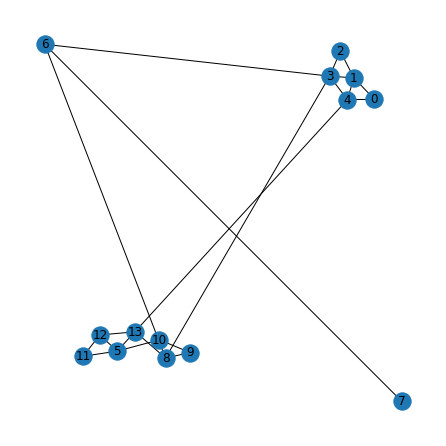

In [ ]:
G = top.create_nxgraph(Net)
pos = nx.spring_layout(G, seed=3068)    # Seed layout for reproducibility)
plt.figure(figsize=(6,6))
nx.draw(G,pos=pos,with_labels=True)
plt.show()

In [ ]:
centrry(G)

source vertex {target:length, }
0 {0: 0, 1: 1, 4: 1, 2: 2, 3: 2} 
1 {1: 0, 0: 1, 2: 1, 3: 1, 4: 1} 
4 {4: 0, 0: 1, 1: 1, 3: 1, 2: 2} 
2 {2: 0, 1: 1, 3: 1, 0: 2, 4: 2} 
3 {3: 0, 1: 1, 2: 1, 4: 1, 0: 2} 
5 {5: 0, 10: 1, 11: 1, 12: 1, 9: 2, 13: 2, 8: 3} 
10 {10: 0, 9: 1, 5: 1, 8: 2, 11: 2, 12: 2, 13: 3} 
11 {11: 0, 12: 1, 5: 1, 10: 2, 13: 2, 8: 3, 9: 3} 
12 {12: 0, 13: 1, 11: 1, 5: 1, 8: 2, 10: 2, 9: 3} 
8 {8: 0, 9: 1, 13: 1, 10: 2, 12: 2, 11: 3, 5: 3} 
9 {9: 0, 8: 1, 10: 1, 5: 2, 13: 2, 11: 3, 12: 3} 
13 {13: 0, 8: 1, 12: 1, 9: 2, 5: 2, 11: 2, 10: 3} 

average shortest path length 1.4054054054054055
with lenght X we have y path
0 12
1 30
2 22
3 10
some shit happens because of parted grapg


# jjjjjjjjjjjjjjjjjjjj

In [2]:
def centrry(G):
    pathlengths = []
    print("source vertex {target:length, }")
    for v in G.nodes():
        spl = dict(nx.single_source_shortest_path_length(G, v))
        print(f"{v} {spl} ")
        for p in spl:
            pathlengths.append(spl[p])

    print()
    print(f"average shortest path length {sum(pathlengths) / len(pathlengths)}")

    # histogram of path lengths
    dist = {}
    for p in pathlengths:
        if p in dist:
            dist[p] += 1
        else:
            dist[p] = 1

    # print()
    print("with lenght X we have y path")
    verts = dist.keys()
    for d in sorted(verts):
        print(f"{d} {dist[d]}")
    try:
        print(f"radius: {nx.radius(G)}")
        print(f"diameter: {nx.diameter(G)}") #maximum lenght
        print(f"eccentricity: {nx.eccentricity(G)}")
        print(f"center: {nx.center(G)}")
        print(f"periphery: {nx.periphery(G)}") # nodes with max lenght
        print(f"density: {nx.density(G)}")
    except:print("some shit happens because of parted grapg")

In [9]:
G0 = biggest_sub(G)

NameError: ignored

In [10]:
centrry(G)

source vertex {target:length, }
0 {0: 0, 1: 1, 4: 1, 2: 2, 3: 2, 5: 2, 6: 3, 8: 3, 10: 3, 11: 3, 12: 3, 7: 4, 9: 4, 13: 4} 
1 {1: 0, 0: 1, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 8: 2, 7: 3, 9: 3, 10: 3, 11: 3, 12: 3, 13: 3} 
4 {4: 0, 0: 1, 1: 1, 3: 1, 5: 1, 2: 2, 6: 2, 8: 2, 10: 2, 11: 2, 12: 2, 7: 3, 9: 3, 13: 3} 
2 {2: 0, 1: 1, 3: 1, 0: 2, 4: 2, 6: 2, 8: 2, 5: 3, 7: 3, 9: 3, 13: 3, 10: 4, 11: 4, 12: 4} 
3 {3: 0, 1: 1, 2: 1, 4: 1, 6: 1, 8: 1, 0: 2, 5: 2, 7: 2, 9: 2, 13: 2, 10: 3, 11: 3, 12: 3} 
5 {5: 0, 10: 1, 11: 1, 12: 1, 4: 1, 0: 2, 1: 2, 3: 2, 9: 2, 13: 2, 2: 3, 6: 3, 8: 3, 7: 4} 
10 {10: 0, 9: 1, 5: 1, 4: 2, 8: 2, 11: 2, 12: 2, 0: 3, 1: 3, 3: 3, 6: 3, 13: 3, 2: 4, 7: 4} 
11 {11: 0, 12: 1, 5: 1, 4: 2, 10: 2, 13: 2, 0: 3, 1: 3, 3: 3, 8: 3, 9: 3, 2: 4, 6: 4, 7: 5} 
12 {12: 0, 13: 1, 11: 1, 5: 1, 4: 2, 8: 2, 10: 2, 0: 3, 1: 3, 3: 3, 6: 3, 9: 3, 2: 4, 7: 4} 
8 {8: 0, 9: 1, 3: 1, 13: 1, 6: 1, 1: 2, 2: 2, 4: 2, 7: 2, 10: 2, 12: 2, 0: 3, 5: 3, 11: 3} 
9 {9: 0, 8: 1, 10: 1, 3: 2, 5: 2, 6: 2, 13: 2

Example-1: a quick and shor implementation.

Int64Index([], dtype='int64')


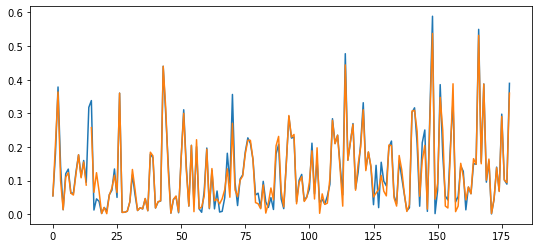

In [24]:
current = pd.DataFrame() # just some visualization
h= [9] # this is list of nodes that we want to remove in first place
# h = remove_edges
Net = Network(); # create a new network each time we run
pp.rundcpp(net=Net); # run the current equation 
current['base'] = Net.res_line['i_ka'];
pp.drop_buses(Net, h, drop_elements=True); # drop the nodes
linka = []  # list o removed lines
pp.rundcpp(net=Net); # run the current equation 
while len(pp.overloaded_lines(Net))!= 0:
    for i in pp.overloaded_lines(Net):
        linka.append(i)
    print(pp.overloaded_lines(Net));
    pp.drop_lines(Net, lines=pp.overloaded_lines(Net));
    pp.rundcpp(net=Net);
print(pp.overloaded_lines(Net));
current['af_r_7'] = Net.res_line['i_ka'];
current['base'].plot(figsize = (9,4));
current['af_r_7'].plot(figsize = (9,4));

[]


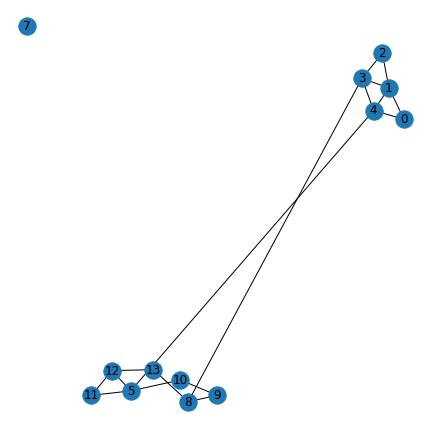

In [ ]:
lost = []                                       # list of edges that 
for i in range(len(linka)):                     # must be removed
    lost.append(line["line"][linka].iloc[i])
print(lost)
#-------------------------------------------------------------------------------
G = top.create_nxgraph(Net)
original_nodes = G.nodes()
pos = nx.spring_layout(G, seed=3068)    # Seed layout for reproducibility)
G.remove_nodes_from(h)
G.remove_edges_from(lost)
plt.figure(figsize=(6,6))
nx.draw(G,pos=pos,with_labels=True)
plt.show()

In [ ]:
def biggest_sub(G):
    # identify largest connected component
    old_nodes = set(G.nodes())
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    return G.subgraph(Gcc[0])

In [ ]:
H = sorted(nx.connected_components(G), key=len, reverse=True)
print(H)
#! check if ext_bus is in there else go next
print("presentage of reminders: {}".format(len(H[0])/len(G.nodes)))

[{0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13}, {7}]
presentage of reminders: 0.9230769230769231


len of the largest component is: 12
presentage of the reminded nodes are: 0.8571428571428571


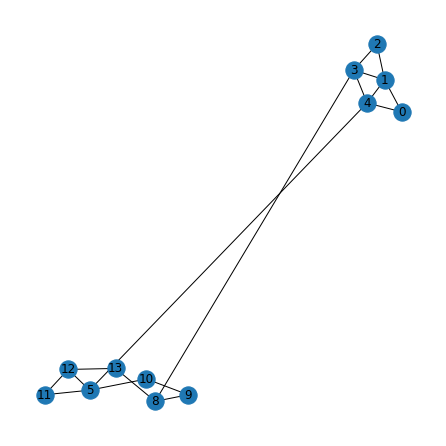

In [ ]:
# identify largest connected component
old_nodes = set(G.nodes())
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
New_nodes = set(Gcc[0])
remove_edges = old_nodes-New_nodes
print("len of the largest component is: {}".format(len(New_nodes)))
print("presentage of the reminded nodes are: {}".format(len(New_nodes)/(len(original_nodes)+1)))
#------------------------------------
# plot lorgest component
#------------------------------------
he = remove_edges
pp.drop_buses(Net, he, drop_elements=True); # drop the nodes
G.remove_nodes_from(he)
plt.figure(figsize=(6,6))
nx.draw(G,pos=pos,with_labels=True)
plt.show()

largest component by renadom removing nodes

In [ ]:
c = np.random.randint(low=0,high=2868,size=10)
c

array([1682, 2730, 2493, 1084, 2283, 2734, 2760, 1564,  116, 2764])

In [ ]:
Net.bus

,in_service,max_vm_pu,min_vm_pu,name,type,vn_kv,zone
0,True,1.06,0.94,1,b,135.000,1.0
1,True,1.06,0.94,2,b,135.000,1.0
2,True,1.06,0.94,3,b,135.000,1.0
3,True,1.06,0.94,4,b,135.000,1.0
4,True,1.06,0.94,5,b,135.000,1.0
5,True,1.06,0.94,6,b,0.208,1.0
6,True,1.06,0.94,7,b,14.000,1.0
7,True,1.06,0.94,8,b,12.000,1.0
8,True,1.06,0.94,9,b,0.208,1.0
9,True,1.06,0.94,10,b,0.208,1.0


In [ ]:
Net.bus

,in_service,max_vm_pu,min_vm_pu,name,type,vn_kv,zone
0,True,1.06,0.94,1,b,135.000,1.0
1,True,1.06,0.94,2,b,135.000,1.0
2,True,1.06,0.94,3,b,135.000,1.0
3,True,1.06,0.94,4,b,135.000,1.0
4,True,1.06,0.94,5,b,135.000,1.0
5,True,1.06,0.94,6,b,0.208,1.0
6,True,1.06,0.94,7,b,14.000,1.0
7,True,1.06,0.94,8,b,12.000,1.0
8,True,1.06,0.94,9,b,0.208,1.0
9,True,1.06,0.94,10,b,0.208,1.0


In [ ]:
netbus = Net.bus['name'] -1

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
Name: name, dtype: object

12


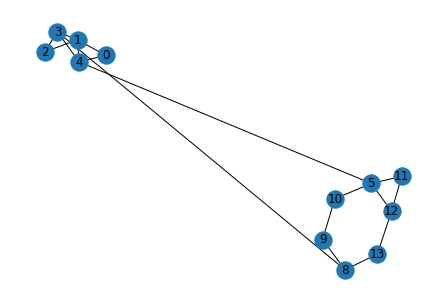

In [ ]:
G = top.create_nxgraph(Net)
print(len(G.nodes()))
nx.draw(G,with_labels=True)

In [ ]:
pp.different_voltage_levels_connected(net=Net)

In [ ]:
Net

In [40]:
Network = pn.case30
Net = Network(); # create a new network
shunt = list(Net.shunt['bus'])
load = list(Net.load['bus'])
gen = list(Net.gen['bus'])
ext_grid = list(Net.ext_grid['bus'])
from_bus = Net.line['from_bus']                                # edges from this network for basic
to_bus = Net.line['to_bus']                                    # visualization.
g = top.create_nxgraph(Net)
original_nodes = g.nodes()
Org_edges = g.edges()
high = len(original_nodes)
print(high)
outages = pd.DataFrame()
# pos = nx.spring_layout(g, seed=3068)    # Seed layout for reproducibility)
# old_nodes1 = set(g.nodes())
#-------------------------------------------------------------------------------
num = 50
outage_num = []
outage = []
outage_link = []
remove_nodes = []
kind = []
lost = []
nodes = []
for j in original_nodes:
    c = [j,5]
    # c0 = np.random.randint(low=0,high=high,size=2)
    # c.extend(c0)
    # c[0] = 5
    if int(Net.ext_grid['bus']) not in c:
        if j in shunt:
            kin = 'shunt'
        elif j in gen:
            kin = 'gen'
        elif j in load:
            kin = 'load'
        else:
            # print("shit {}".format(j))
            kin = 'trafo'
        kind.append(kin)
        outage_num.append(c)
        h= c # this is list of nodes that we want to remove in first place
        # h = c
        Net = Network(); # create a new network each time we run
        pp.drop_buses(Net, h, drop_elements=True); # drop the nodes
        linka = []  # list o removed lines
        pp.rundcpp(net=Net); # run the current equation 
        while len(pp.overloaded_lines(Net))!= 0:
            for i in pp.overloaded_lines(Net):
                linka.append(i)
            pp.drop_lines(Net, lines=pp.overloaded_lines(Net));
            pp.rundcpp(net=Net);
        #-------------------------------------------------------------------------------
                                    # list of edges that 
        # for i in range(len(linka)):                     # must be removed
        #     lost.append(line["line"][linka].iloc[i])
        # lost
        # # print(linka)
        # outage_link.append(len(lost))
        # #-------------------------------------------------------------------------------
        g = top.create_nxgraph(Net)
        # # original_nodes = g.nodes()

        # g.remove_nodes_from(h)
        # g.remove_edges_from(lost)
        #-------------------------------------------------------------------------------
        # identify largest connected component
        old_nodes = set(g.nodes())
        Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
        # G0 = g.subgraph(Gcc[0])
        for k in Gcc:
            if int(Net.ext_grid['bus']) in k:
                GG = g.subgraph(k)
                # New_nodes = set(k)
        # print(New_nodes)
        New_nodes = set(GG.nodes())
        remove_node = original_nodes-New_nodes
        # remove_nodes.append(len(remove_node))
        remove_nodes.append(len(remove_node))
        outage.append(1-(len(New_nodes)/len(original_nodes)))
        lost.append(set(Org_edges)-set(GG.edges()))
        nodes.append(New_nodes)
        # outage_link.append(len(lost))
        # print("node {} and amount {}".format(c,outage[c]))
        # print("len of the largest component is: {}".format(len(New_nodes)))
        # print("presentage of the reminded nodes are: {}".format(len(New_nodes)/len(original_nodes)))
    else:
        pass
        # outage.append(1)
        # outage_num.append([c,c2])
        # outage_link.append(np.nan)
    # print(j)  
outages['otages_rand_num'] = outage_num
outages['kind'] = kind    
outages['New_nodes'] = nodes
outages['otages_rand'] = outage
outages['outage_link'] = lost
outages['remove_nodes'] = remove_nodes  
#------------------------------------
# plot lorgest component
#------------------------------------
# he = remove_edges
# pp.drop_buses(Net, he, drop_elements=True); # drop the nodes
# g.remove_nodes_from(he)
# plt.figure(figsize=(6,6))
# nx.draw(g,pos=pos,with_labels=True)
# plt.show()
outages

30


,otages_rand_num,kind,New_nodes,otages_rand,outage_link,remove_nodes
0,"[1, 5]",gen,"{0, 2, 3, 11, 12, 13, 14, 15}",0.733333,"{(5, 9), (14, 17), (1, 3), (22, 23), (5, 6), (...",22
1,"[2, 5]",load,"{0, 1, 3, 4, 6, 11, 12, 13, 14, 15}",0.666667,"{(5, 9), (14, 17), (22, 23), (5, 6), (28, 29),...",20
2,"[3, 5]",load,"{0, 1, 2, 4, 6}",0.833333,"{(5, 9), (14, 17), (1, 3), (22, 23), (5, 6), (...",25
3,"[4, 5]",shunt,"{0, 1, 2, 3, 11, 12, 13, 14, 15}",0.700000,"{(5, 9), (14, 17), (22, 23), (5, 6), (28, 29),...",21
4,"[5, 5]",trafo,"{0, 1, 2, 3, 4, 6, 11, 12, 13, 14, 15}",0.633333,"{(5, 9), (14, 17), (22, 23), (5, 6), (28, 29),...",19
5,"[6, 5]",load,"{0, 1, 2, 3, 4, 11, 12, 13, 14, 15}",0.666667,"{(5, 9), (14, 17), (22, 23), (5, 6), (28, 29),...",20
6,"[7, 5]",load,"{0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 1...",0.066667,"{(5, 9), (5, 6), (7, 27), (5, 7), (1, 5), (5, ...",2
7,"[8, 5]",trafo,"{0, 1, 2, 3, 4, 6, 11, 12, 13, 14, 15}",0.633333,"{(5, 9), (14, 17), (22, 23), (5, 6), (28, 29),...",19
8,"[9, 5]",load,"{0, 1, 2, 3, 4, 6, 11, 12, 13, 14, 15, 16, 17,...",0.500000,"{(5, 9), (22, 23), (5, 6), (28, 29), (24, 26),...",15
9,"[10, 5]",trafo,"{0, 1, 2, 3, 4, 6, 11, 12, 13, 14, 15}",0.633333,"{(5, 9), (14, 17), (22, 23), (5, 6), (28, 29),...",19


for removing nodes [9, 5]


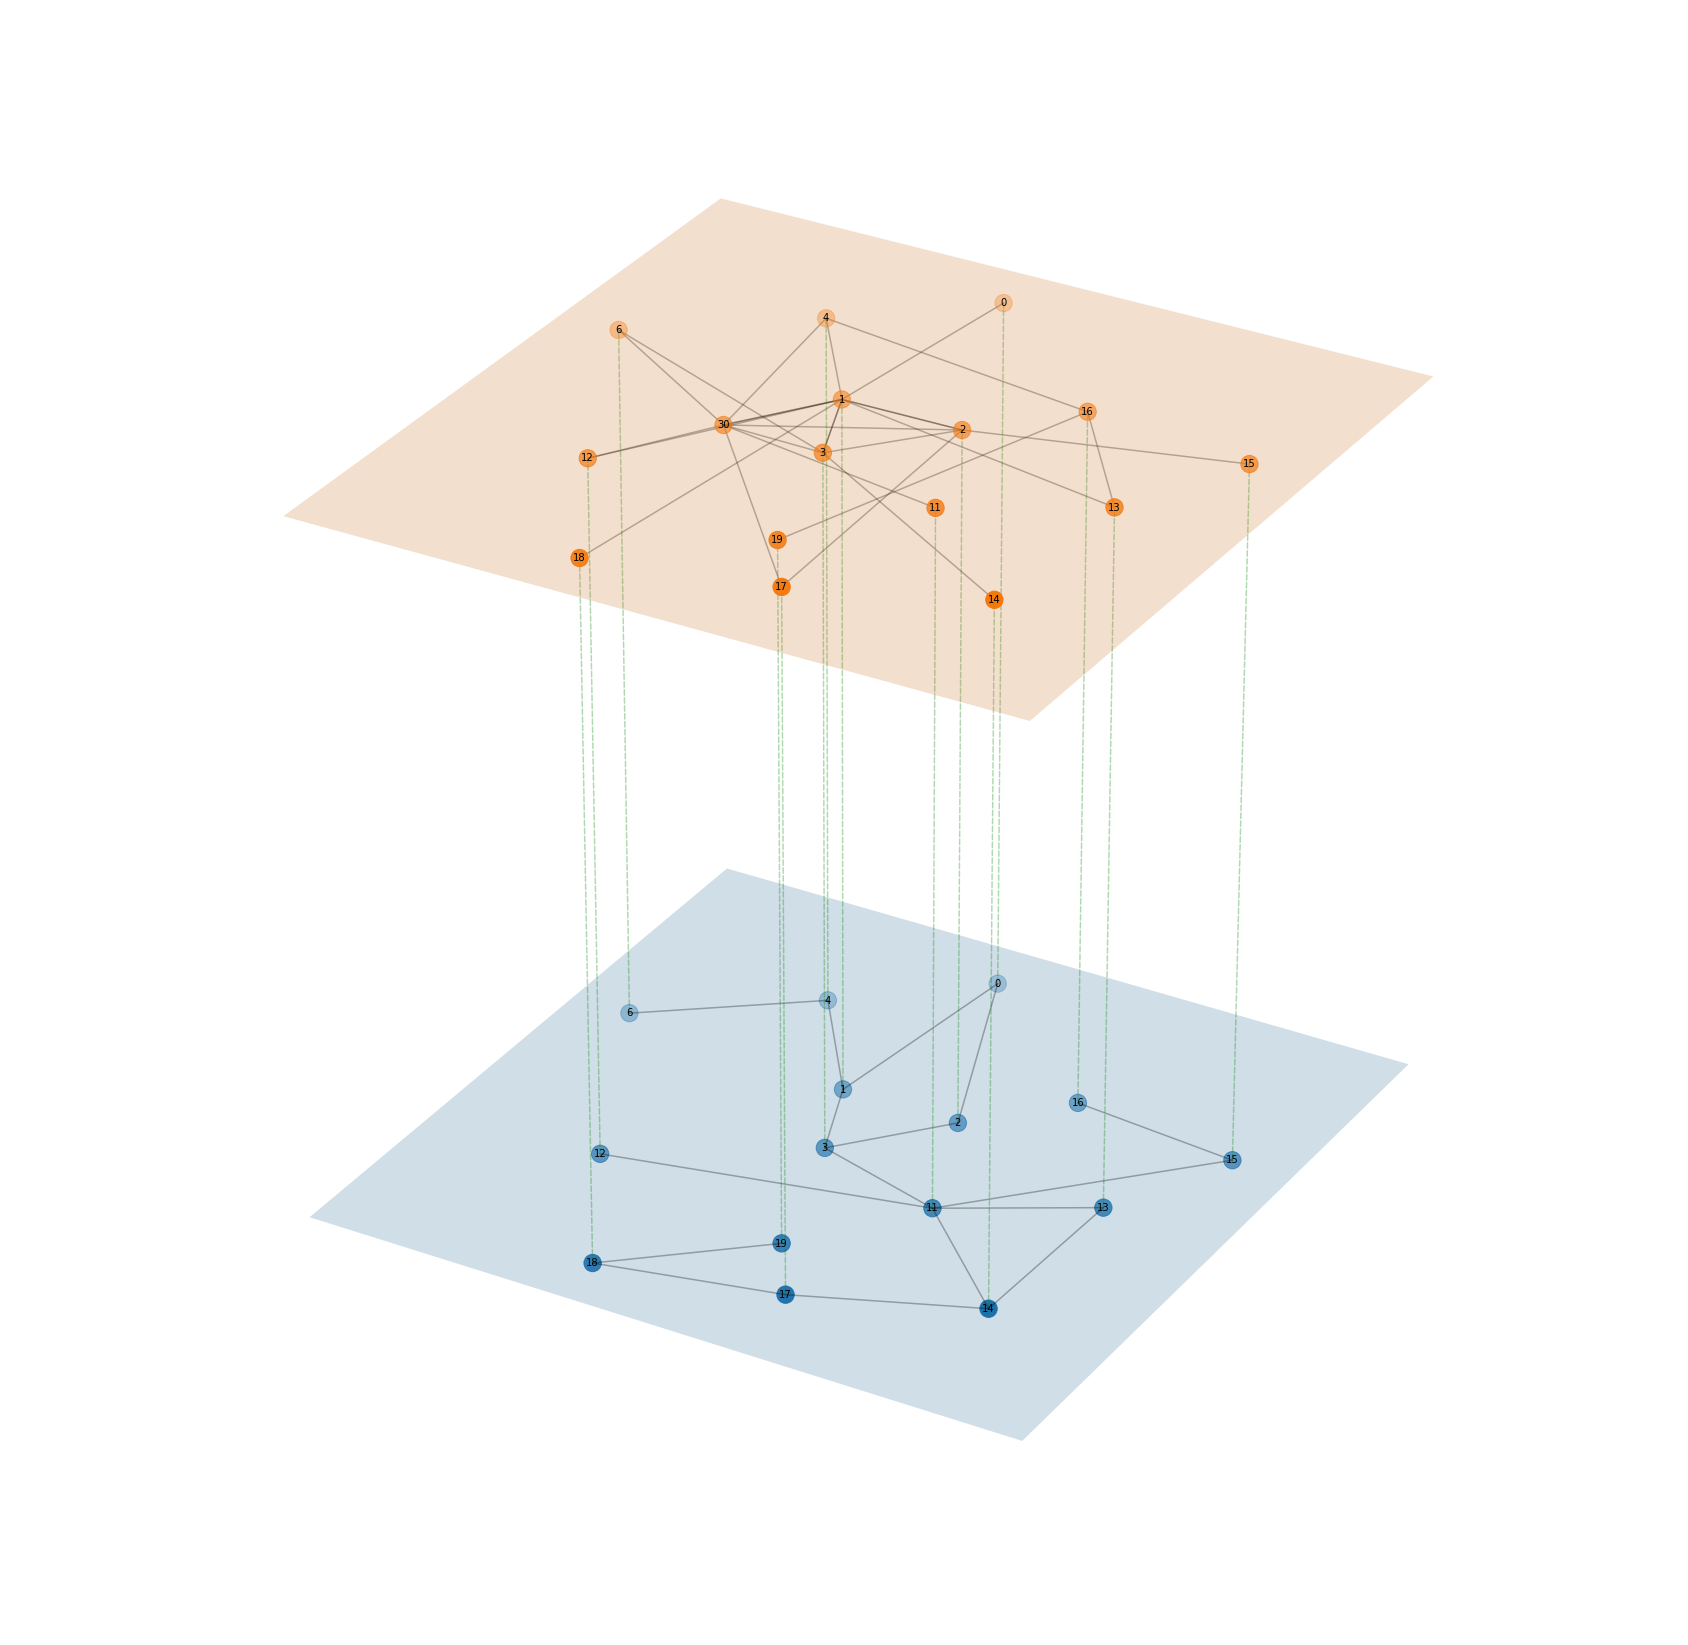

In [88]:
#!/usr/bin/env python
"""
Plot multi-graphs in 3D.
"""
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection


class LayeredNetworkGraph(object):

    def __init__(self, graphs, node_labels=None, layout=nx.spring_layout, ax=None):
        """Given an ordered list of graphs [g1, g2, ..., gn] that represent
        different layers in a multi-layer network, plot the network in
        3D with the different layers separated along the z-axis.

        Within a layer, the corresponding graph defines the connectivity.
        Between layers, nodes in subsequent layers are connected if
        they have the same node ID.

        Arguments:
        ----------
        graphs : list of networkx.Graph objects
            List of graphs, one for each layer.

        node_labels : dict node ID : str label or None (default None)
            Dictionary mapping nodes to labels.
            If None is provided, nodes are not labelled.

        layout_func : function handle (default networkx.spring_layout)
            Function used to compute the layout.

        ax : mpl_toolkits.mplot3d.Axes3d instance or None (default None)
            The axis to plot to. If None is given, a new figure and a new axis are created.

        """

        # book-keeping
        self.seed = 1531
        self.graphs = graphs
        self.total_layers = len(graphs)

        self.node_labels = node_labels
        self.layout = layout

        if ax:
            self.ax = ax
        else:
            fig = plt.figure()
            self.ax = fig.add_subplot(111, projection='3d')

        # create internal representation of nodes and edges
        self.get_nodes()
        self.get_edges_within_layers()
        self.get_edges_between_layers()

        # compute layout and plot
        self.get_node_positions()
        self.draw()


    def get_nodes(self):
        """Construct an internal representation of nodes with the format (node ID, layer)."""
        self.nodes = []
        for z, g in enumerate(self.graphs):
            self.nodes.extend([(node, z) for node in g.nodes()])


    def get_edges_within_layers(self):
        """Remap edges in the individual layers to the internal representations of the node IDs."""
        self.edges_within_layers = []
        for z, g in enumerate(self.graphs):
            self.edges_within_layers.extend([((source, z), (target, z)) for source, target in g.edges()])


    def get_edges_between_layers(self):
        """Determine edges between layers. Nodes in subsequent layers are
        thought to be connected if they have the same ID."""
        self.edges_between_layers = []
        for z1, g in enumerate(self.graphs[:-1]):
            z2 = z1 + 1
            h = self.graphs[z2]
            shared_nodes = set(g.nodes()) & set(h.nodes())
            self.edges_between_layers.extend([((node, z1), (node, z2)) for node in shared_nodes])


    def get_node_positions(self, *args, **kwargs):
        """Get the node positions in the layered layout."""
        # What we would like to do, is apply the layout function to a combined, layered network.
        # However, networkx layout functions are not implemented for the multi-dimensional case.
        # Futhermore, even if there was such a layout function, there probably would be no straightforward way to
        # specify the planarity requirement for nodes within a layer.
        # Therefor, we compute the layout for the full network in 2D, and then apply the
        # positions to the nodes in all planes.
        # For a force-directed layout, this will approximately do the right thing.
        # TODO: implement FR in 3D with layer constraints.

        composition = self.graphs[0]
        for h in self.graphs[1:]:
            composition = nx.compose(composition, h)

        pos = self.layout(composition, *args, **kwargs,seed=self.seed)

        self.node_positions = dict()
        for z, g in enumerate(self.graphs):
            self.node_positions.update({(node, z) : (*pos[node], z) for node in g.nodes()})


    def draw_nodes(self, nodes, *args, **kwargs):
        x, y, z = zip(*[self.node_positions[node] for node in nodes])
        self.ax.scatter(x, y, z, *args, **kwargs)


    def draw_edges(self, edges, *args, **kwargs):
        segments = [(self.node_positions[source], self.node_positions[target]) for source, target in edges]
        line_collection = Line3DCollection(segments, *args, **kwargs)
        self.ax.add_collection3d(line_collection)


    def get_extent(self, pad=0.1):
        xyz = np.array(list(self.node_positions.values()))
        xmin, ymin, _ = np.min(xyz, axis=0)
        xmax, ymax, _ = np.max(xyz, axis=0)
        dx = xmax - xmin
        dy = ymax - ymin
        return (xmin - pad * dx, xmax + pad * dx), \
            (ymin - pad * dy, ymax + pad * dy)


    def draw_plane(self, z, *args, **kwargs):
        (xmin, xmax), (ymin, ymax) = self.get_extent(pad=0.1)
        u = np.linspace(xmin, xmax, 10)
        v = np.linspace(ymin, ymax, 10)
        U, V = np.meshgrid(u ,v)
        W = z * np.ones_like(U)
        self.ax.plot_surface(U, V, W, *args, **kwargs)


    def draw_node_labels(self, node_labels, *args, **kwargs):
        for node, z in self.nodes:
            if node in node_labels:
                ax.text(*self.node_positions[(node, z)], node_labels[node], *args, **kwargs)


    def draw(self):

        self.draw_edges(self.edges_within_layers,  color='k', alpha=0.3, linestyle='-', zorder=2)
        self.draw_edges(self.edges_between_layers, color='g', alpha=0.3, linestyle='--', zorder=2)
        # print(self.edges_between_layers)
        for z in range(self.total_layers):
            self.draw_plane(z, alpha=0.2, zorder=1)
            self.draw_nodes([node for node in self.nodes if node[1]==z], s=300, zorder=3)

        if self.node_labels:
            self.draw_node_labels(self.node_labels,
                                  horizontalalignment='center',
                                  verticalalignment='center',
                                  zorder=100)


if __name__ == '__main__':
    u = 8
    k = list(outages['New_nodes'][u])
    print("for removing nodes {}".format(outages['otages_rand_num'][u]))

    j_ = j.subgraph(k)
    k.append(n-1)
    i_ = i.subgraph(k)
    # initialise figure and plot
    fig = plt.figure(figsize=(30,30))
    ax = fig.add_subplot(111, projection='3d')
    LayeredNetworkGraph([j_, i_], node_labels=node_labels, ax=ax, layout=nx.spring_layout)
    # LayeredNetworkGraph([j, i], node_labels=node_labels, ax=ax, layout=nx.spring_layout)
    ax.set_axis_off()
    plt.show()

In [86]:
set(i_.edges())

{(0, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 12),
 (1, 13),
 (1, 30),
 (2, 3),
 (2, 15),
 (2, 30),
 (3, 6),
 (3, 14),
 (3, 30),
 (4, 30),
 (6, 30),
 (11, 30),
 (12, 30)}

In [73]:

# define graphs
# n = 50
seed = 1531
# n = 10
# m = 3
# p = 0.1
# Network = pn.case_illinois200
Net = Network() # in this example we use IEEE network known as 30-buses
j = top.create_nxgraph(Net)
n = len(j.nodes())+1
initial_n = n
# g = nx.watts_strogatz_graph(4*n,m,p,seed = seed)
# g = nx.erdos_renyi_graph(4*n, p=0.1, seed=seed)
# h = nx.gnm_random_graph(4*n, 5*n, seed = seed )
alpha = 0.49
beta = 0.5
gamma = 1-(alpha + beta)
Gr = nx.scale_free_graph(n= n, alpha= alpha, beta= beta, gamma= gamma, seed= seed, delta_in=1, delta_out=1 )
edge = list(Gr.edges)
edges = [(i[0],i[1]) for i in edge if i[0]!=i[1] ]
i = nx.MultiGraph()
i.add_edges_from(set(edges))
mapping = {0:len(i.nodes)-1,len(i.nodes)-1:0}
i = nx.relabel_nodes(i, mapping)
# mapping = {5:6,6:5}
# i = nx.relabel_nodes(i, mapping)
# i = nx.erdos_renyi_graph(2*n, p=0.4)
# print(len(i.nodes))
node_labels = {nn : str(nn) for nn in range(4*n+1)}


In [87]:
len(set(edges))

51

In [ ]:
outages[outages['remove_nodes'] > 80]

,otages_rand_num,kind,otages_rand,outage_link,remove_nodes
22,"[22, 76, 48, 36, 74, 33]",load,0.889831,0,105
23,"[23, 76, 48, 36, 74, 33]",gen,0.898305,0,106
67,"[69, 76, 48, 36, 74, 33]",gen,0.940678,0,111


In [ ]:
outages['kind']

0        gen
1       load
2       load
3        gen
4      shunt
       ...  
108      gen
109     load
110     load
111     load
112     load
Name: kind, Length: 113, dtype: object

In [ ]:
outages['otages_rand'].describe()

count    113.000000
mean       0.091678
std        0.031124
min        0.078947
25%        0.087719
50%        0.087719
75%        0.087719
max        0.377193
Name: otages_rand, dtype: float64

In [ ]:
outages[outages['otages_rand']>0.15]

,otages_rand_num,kind,otages_rand,outage_link,remove_nodes
48,[48],gen,0.219298,0,"{7, 8, 9, 25, 29, 37, 48, 49, 50, 51, 52, 53, ..."
75,[76],gen,0.377193,0,"{7, 8, 9, 25, 29, 37, 62, 63, 64, 76, 77, 78, ..."
98,[99],gen,0.175439,0,"{7, 8, 9, 25, 29, 37, 62, 63, 64, 99, 102, 103..."


In [ ]:
Net = Network();
Net

This pandapower network includes the following parameter tables:
   - bus (30 elements)
   - load (20 elements)
   - gen (5 elements)
   - shunt (2 elements)
   - ext_grid (1 element)
   - line (41 elements)
   - poly_cost (6 elements)
   - bus_geodata (30 elements)

In [ ]:
shunt = list(Net.shunt['bus'])
load = list(Net.load['bus'])
gen = list(Net.gen['bus'])
ext_grid = list(Net.ext_grid['bus'])


[4, 23]

In [ ]:
Net.gen

,bus,controllable,in_service,name,p_mw,scaling,sn_mva,type,vm_pu,slack,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar,slack_weight
0,1,True,True,None,60.97,1.0,NaN,None,1.0,False,80.0,0.0,60.0,-20.0,0.0
1,21,True,True,None,21.59,1.0,NaN,None,1.0,False,50.0,0.0,62.5,-15.0,0.0
2,26,True,True,None,26.91,1.0,NaN,None,1.0,False,55.0,0.0,48.7,-15.0,0.0
3,22,True,True,None,19.20,1.0,NaN,None,1.0,False,30.0,0.0,40.0,-10.0,0.0
4,12,True,True,None,37.00,1.0,NaN,None,1.0,False,40.0,0.0,44.7,-15.0,0.0


In [ ]:
Net

This pandapower network includes the following parameter tables:
   - bus (2866 elements)
   - load (1309 elements)
   - sgen (179 elements)
   - gen (509 elements)
   - shunt (2194 elements)
   - ext_grid (1 element)
   - line (4046 elements)
   - trafo (530 elements)
   - poly_cost (510 elements)
   - bus_geodata (2866 elements)
 and the following results tables:
   - res_bus (2866 elements)
   - res_line (4046 elements)
   - res_trafo (530 elements)
   - res_ext_grid (1 element)
   - res_load (1309 elements)
   - res_sgen (179 elements)
   - res_shunt (2194 elements)
   - res_gen (509 elements)

# Graph

# Implemetation

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
g = nx.Graph()
g.add_edges_from(edges)
pos = nx.spring_layout(g, seed=3068)  # Seed layout for reproducibility
g.remove_node(h)
plt.figure(figsize=(12,12))
nx.draw(g,pos=pos,with_labels=True)
plt.show()

In [ ]:
edges

In [ ]:
g = nx.Graph()
g.add_edges_from(edges)


In [ ]:
pos = nx.spring_layout(g, seed=3068)  # Seed layout for reproducibility

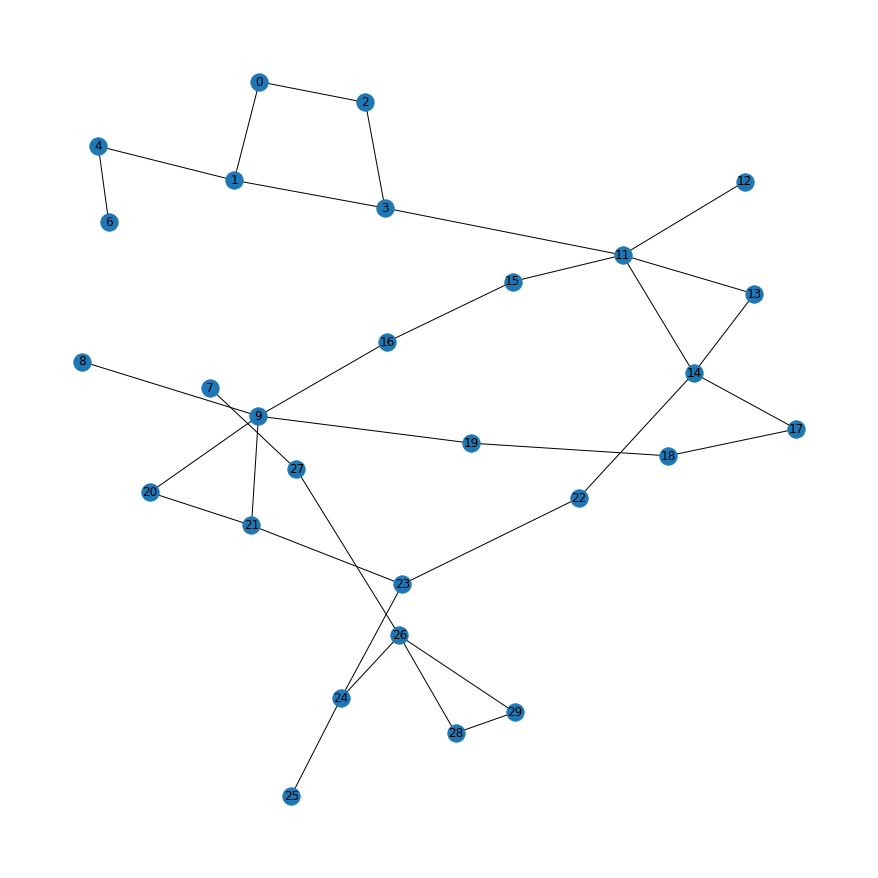

In [ ]:
plt.figure(figsize=(12,12))
nx.draw(g,pos=pos,with_labels=True)
plt.show()

In [ ]:
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
Gcc

In [ ]:
O0 = Gcc[1]
O0

{7, 8, 9, 25, 29, 37, 62, 63, 64}

In [ ]:
O1 = list(Net.gen['bus'])

In [ ]:
for i in O1:
    if i in O0:
        print(i)

7
9
25
64


In [ ]:
largest_cc = max(nx.connected_components(g), key=len)
largest_cc

In [ ]:
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
G0 = g.subgraph(Gcc[0])

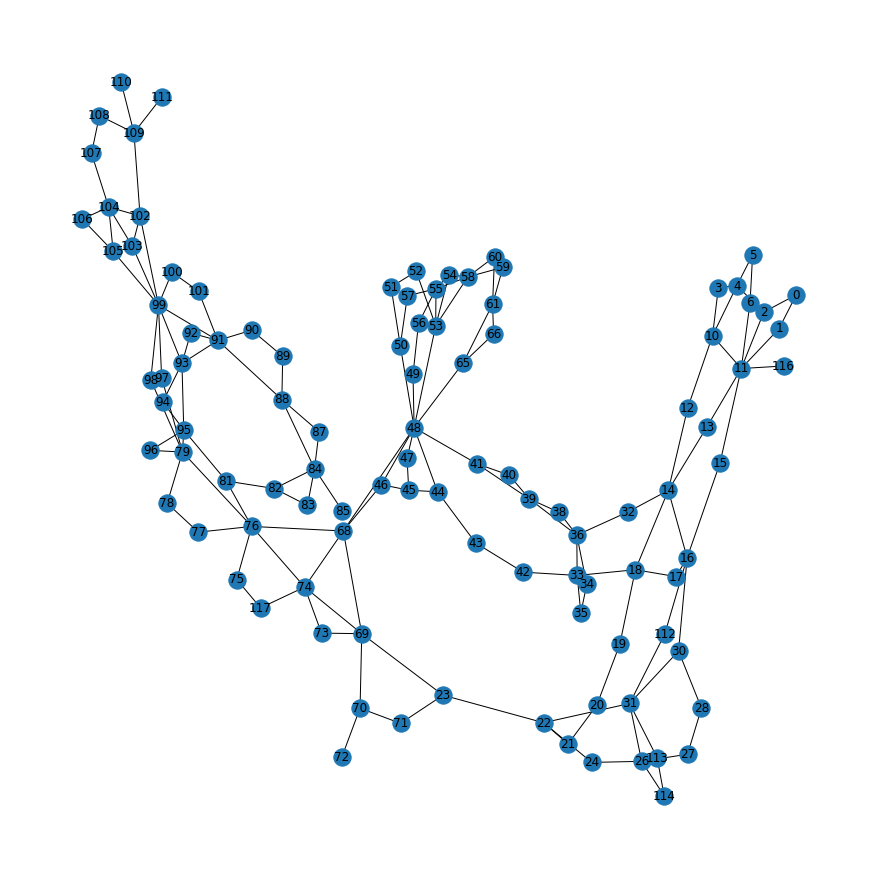

In [ ]:
plt.figure(figsize=(12,12))
nx.draw(G0,pos=pos,with_labels=True)
plt.show()

In [ ]:
G = nx.Graph()
G.add_edges_from(edges)
pathlengths = []

print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    print(f"{v} {spl} ")
    for p in spl:
        pathlengths.append(spl[p])

print()
print(f"average shortest path length {sum(pathlengths) / len(pathlengths)}")

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print()
print("with lenght X we have y path")
verts = dist.keys()
for d in sorted(verts):
    print(f"{d} {dist[d]}")

# print(f"radius: {nx.radius(G)}")
# print(f"diameter: {nx.diameter(G)}") #maximum lenght
# print(f"eccentricity: {nx.eccentricity(G)}")
# print(f"center: {nx.center(G)}")
# print(f"periphery: {nx.periphery(G)}") # nodes with max lenght
# print(f"density: {nx.density(G)}")

pos = nx.spring_layout(G, seed=3068)  # Seed layout for reproducibility

# options = {
#     "node_color": "#A0CBE2",
#     "edge_color": "#A4CBE2",
#     "width": 4,
#     "edge_cmap": plt.cm.Blues,
#     "with_labels": False,
# }
# nx.draw(G, pos=pos, **options)

nx.draw(G, pos=pos, with_labels=True,width=1,node_size=2)
plt.show()
# atlas(G)


source vertex {target:length, }
0 {0: 0, 1: 1, 2: 1, 11: 2, 4: 2, 3: 3, 5: 3, 6: 3, 10: 3, 13: 3, 15: 3, 116: 3, 12: 4, 14: 4, 16: 4, 32: 5, 17: 5, 18: 5, 112: 5, 30: 5, 33: 6, 36: 6, 19: 6, 28: 6, 31: 6, 34: 7, 35: 7, 38: 7, 39: 7, 42: 7, 113: 7, 20: 7, 22: 7, 26: 7, 27: 7, 40: 8, 41: 8, 43: 8, 114: 8, 21: 8, 23: 8, 24: 8, 69: 9, 71: 9, 44: 9, 48: 9, 65: 10, 68: 10, 70: 10, 73: 10, 74: 10, 45: 10, 46: 10, 47: 10, 49: 10, 50: 10, 53: 10, 51: 11, 52: 11, 54: 11, 55: 11, 56: 11, 57: 11, 58: 11, 61: 11, 66: 11, 72: 11, 76: 11, 117: 11, 59: 12, 60: 12, 75: 12, 77: 12, 79: 12, 81: 12, 96: 13, 97: 13, 98: 13, 78: 13, 82: 13, 95: 13, 99: 14, 83: 14, 84: 14, 93: 14, 94: 14, 100: 15, 102: 15, 103: 15, 105: 15, 85: 15, 87: 15, 88: 15, 91: 15, 92: 15, 101: 16, 104: 16, 106: 16, 109: 16, 89: 16, 90: 16, 107: 17, 108: 17, 110: 17, 111: 17} 
1 {1: 0, 0: 1, 11: 1, 2: 2, 6: 2, 10: 2, 13: 2, 15: 2, 116: 2, 3: 3, 4: 3, 5: 3, 12: 3, 14: 3, 16: 3, 32: 4, 17: 4, 18: 4, 112: 4, 30: 4, 33: 5, 36: 5, 19: 5, 2

NetworkXError: ignored